In [9]:
# Load necessary libraries
# Install and load libraries
install.packages("tidyverse")
install.packages("data.table")
install.packages("lubridate")
library(tidyverse)
library(data.table)
library(lubridate)


The downloaded binary packages are in
	/var/folders/9z/jnfn6k6j6nd7xchr2fbndyk80000gn/T//Rtmplpzudj/downloaded_packages

The downloaded binary packages are in
	/var/folders/9z/jnfn6k6j6nd7xchr2fbndyk80000gn/T//Rtmplpzudj/downloaded_packages

The downloaded binary packages are in
	/var/folders/9z/jnfn6k6j6nd7xchr2fbndyk80000gn/T//Rtmplpzudj/downloaded_packages



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [10]:
#csv files
calendar <- fread("calendar_afcs2024.csv")
sell_prices <- fread("sell_prices_afcs2024.csv")
sales_train <- fread("sales_train_validation_afcs2024.csv")
sales_test <- fread("sales_test_validation_afcs2024.csv")
sample_submission <- fread("sample_submission_afcs2024.csv")
sales_test_evaluation <- fread("sales_test_evaluation_afcs_2024.csv")


The sales data, contained in three .csv files, spans the period from January 2011 to June 2016, accompanied by additional information on prices and an events calendar.

In [11]:
# Check the files
#calendar: contains information about the dates the products are sold
head(calendar)
#missing values
colSums(is.na(calendar)) 
#The columns related to events (event_name_1, event_type_1, etc.) have many missing values (NA).This indicates that no event was recorded for most of the period.

date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1/29/2011,11101,Saturday,1,1,2011,NA,NA,NA,NA,0
1/30/2011,11101,Sunday,2,1,2011,NA,NA,NA,NA,0
1/31/2011,11101,Monday,3,1,2011,NA,NA,NA,NA,0
2/1/2011,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1
2/2/2011,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0
2/3/2011,11101,Thursday,6,2,2011,NA,NA,NA,NA,1


date     wm_yr_wk      weekday         wday        month         year 
           0            0            0            0            0            0 
event_name_1 event_type_1 event_name_2 event_type_2      snap_TX 
        1807         1807         1964         1964            0

In [12]:
# Summarize numeric columns
summary(calendar)
# Count unique events in `event_name_1`
table(calendar$event_name_1)
#The period is from 2011 to 2016, based on the year column.

     date              wm_yr_wk       weekday               wday      
 Length:1969        Min.   :11101   Length:1969        Min.   :1.000  
 Class :character   1st Qu.:11219   Class :character   1st Qu.:2.000  
 Mode  :character   Median :11337   Mode  :character   Median :4.000  
                    Mean   :11347                      Mean   :3.997  
                    3rd Qu.:11502                      3rd Qu.:6.000  
                    Max.   :11621                      Max.   :7.000  
     month             year      event_name_1       event_type_1      
 Min.   : 1.000   Min.   :2011   Length:1969        Length:1969       
 1st Qu.: 3.000   1st Qu.:2012   Class :character   Class :character  
 Median : 6.000   Median :2013   Mode  :character   Mode  :character  
 Mean   : 6.326   Mean   :2013                                        
 3rd Qu.: 9.000   3rd Qu.:2015                                        
 Max.   :12.000   Max.   :2016                                        
 event


       Chanukah End           Christmas       Cinco De Mayo         ColumbusDay 
                  5                   5                   5                   5 
             Easter         Eid al-Fitr           EidAlAdha        Father's day 
                  5                   5                   5                   4 
          Halloween     IndependenceDay            LaborDay           LentStart 
                  5                   5                   5                   6 
          LentWeek2 MartinLutherKingDay         MemorialDay        Mother's day 
                  6                   5                   6                   6 
       NBAFinalsEnd      NBAFinalsStart             NewYear   OrthodoxChristmas 
                  6                   6                   5                   5 
     OrthodoxEaster          Pesach End       PresidentsDay           Purim End 
                  5                   6                   6                   6 
     Ramadan starts       S

         event_name_1     n
               <char> <int>
 1:     Cinco De Mayo     5
 2:           NewYear     5
 3: OrthodoxChristmas     5
 4:         SuperBowl     5
 5:       VeteransDay     5
 6:          LaborDay     4
 7:    OrthodoxEaster     4
 8:         LentStart     3
 9:      Mother's day     3
10:    NBAFinalsStart     3
11:    Ramadan starts     3
12:       ColumbusDay     2
13:         EidAlAdha     2
14:      NBAFinalsEnd     2
15:      Chanukah End     1
16:            Easter     1
17:         LentWeek2     1
18:        Pesach End     1
19:     PresidentsDay     1
20:         Purim End     1
         event_name_1     n


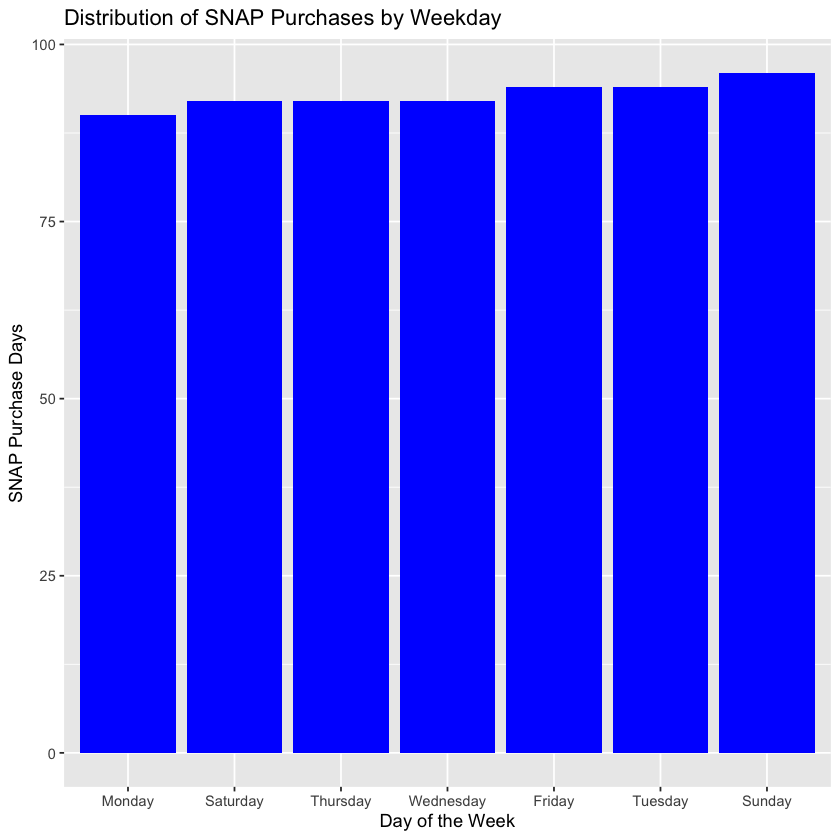

In [13]:

#SNAP provides nutrition benefits to supplement the food budget of needy families. Potential participants must apply in the state they live & meet certain requirements to qualify.
#SNAP purchases for specific events
snap_event_analysis <- calendar %>%
  filter(snap_TX == 1 & !is.na(event_name_1)) %>%
  count(event_name_1, sort = TRUE)
print(snap_event_analysis)

#SNAP purchases by weekdays: but honestly I don't get this 
snap_weekday_analysis <- calendar %>%
  group_by(weekday) %>%
  summarize(snap_days = sum(snap_TX))
ggplot(snap_weekday_analysis, aes(x = reorder(weekday, snap_days), y = snap_days)) +
  geom_col(fill = "blue") +
  labs(
    title = "Distribution of SNAP Purchases by Weekday",
    x = "Day of the Week",
    y = "SNAP Purchase Days"
  )

# A tibble: 6 × 3
   year total_snap_days total_events
  <int>           <int>        <int>
1  2011             110           26
2  2012             120           30
3  2013             120           29
4  2014             120           28
5  2015             120           30
6  2016              60           19


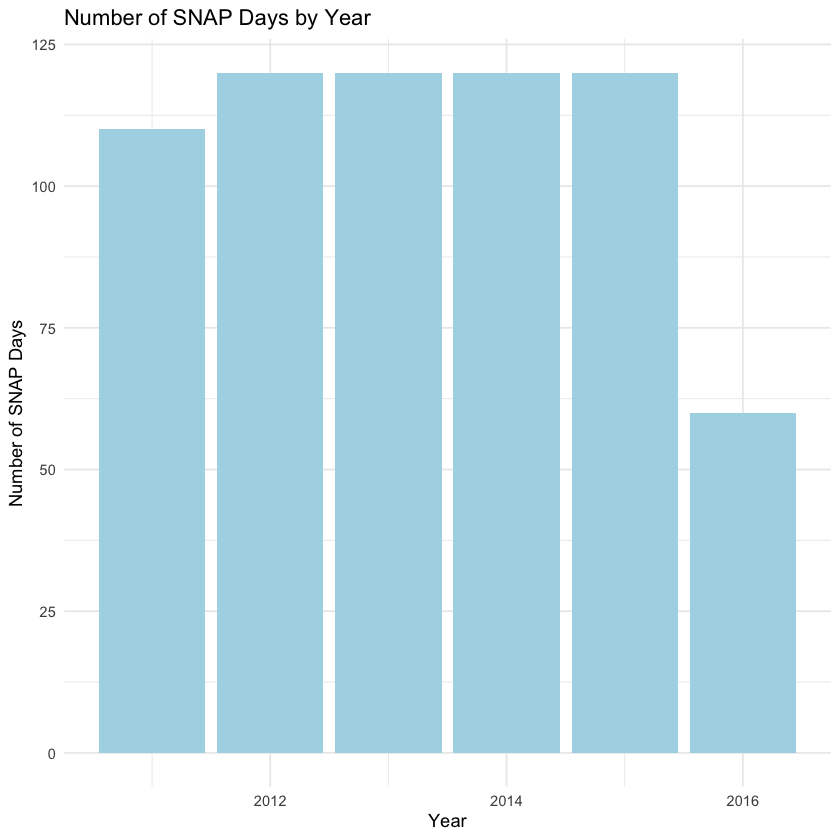

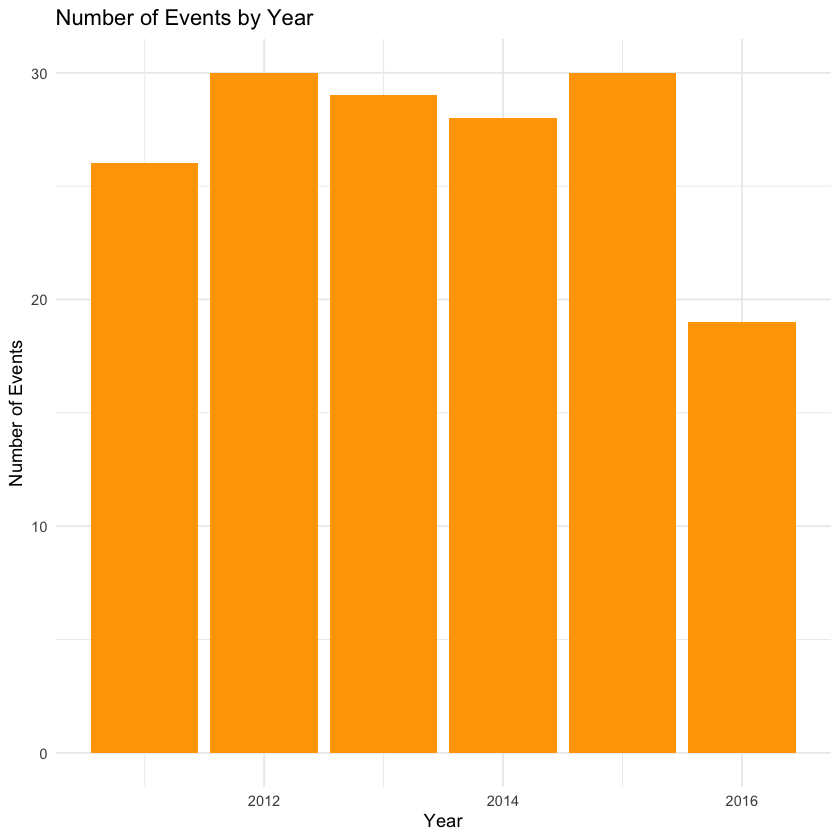

In [14]:

yearly_summary <- calendar %>%
  group_by(year) %>%
  summarize(
    total_snap_days = sum(snap_TX, na.rm = TRUE),  # Total SNAP days per year
    total_events = sum(!is.na(event_name_1))      # Total events per year
  )
print(yearly_summary)
ggplot(yearly_summary, aes(x = year, y = total_snap_days)) +
  geom_col(fill = "lightblue") +
  labs(
    title = "Number of SNAP Days by Year",
    x = "Year",
    y = "Number of SNAP Days"
  ) +
  theme_minimal()

#Events by Year
ggplot(yearly_summary, aes(x = year, y = total_events)) +
  geom_col(fill = "orange") +
  labs(
    title = "Number of Events by Year",
    x = "Year",
    y = "Number of Events"
  ) +
  theme_minimal()

Dates together with related features like day-of-the week, month, year, and special holidays

- Event days: Religious, sports or cultural event days like SuperBowl.
- SNAP days:  whether the stores in each state allowed purchases with [SNAP food stamps](https://www.benefits.gov/benefit/361).



In [15]:
head(sell_prices)
colSums(is.na(sell_prices))

store_id,item_id,wm_yr_wk,sell_price
<chr>,<chr>,<int>,<dbl>
TX_3,FOODS_3_001,11101,2.28
TX_3,FOODS_3_001,11102,2.28
TX_3,FOODS_3_001,11103,2.28
TX_3,FOODS_3_001,11104,2.28
TX_3,FOODS_3_001,11105,2.28
TX_3,FOODS_3_001,11106,2.28


store_id    item_id   wm_yr_wk sell_price 
         0          0          0          0

The dataset contains product price information, including store IDs, item IDs, wm_yr_wk column represents the ID of the week, which identifies each week in the dataset, and corresponding prices (sell_price). The data shows that the product FOODS_3_001 in store TX_3 had a stable price of 2.28 across all listed weeks. There are no missing values, making the data ready for analysis.

This dataset can be linked to other data, like sales or calendar information, to explore trends. For example, we could analyze how prices changed during special events or how price changes affected sales volumes. We could also compare prices between stores or over longer time periods to uncover patterns or differences.

In summary, the data provides a clear view of stable product pricing, but deeper analysis could reveal how pricing connects to sales or events.



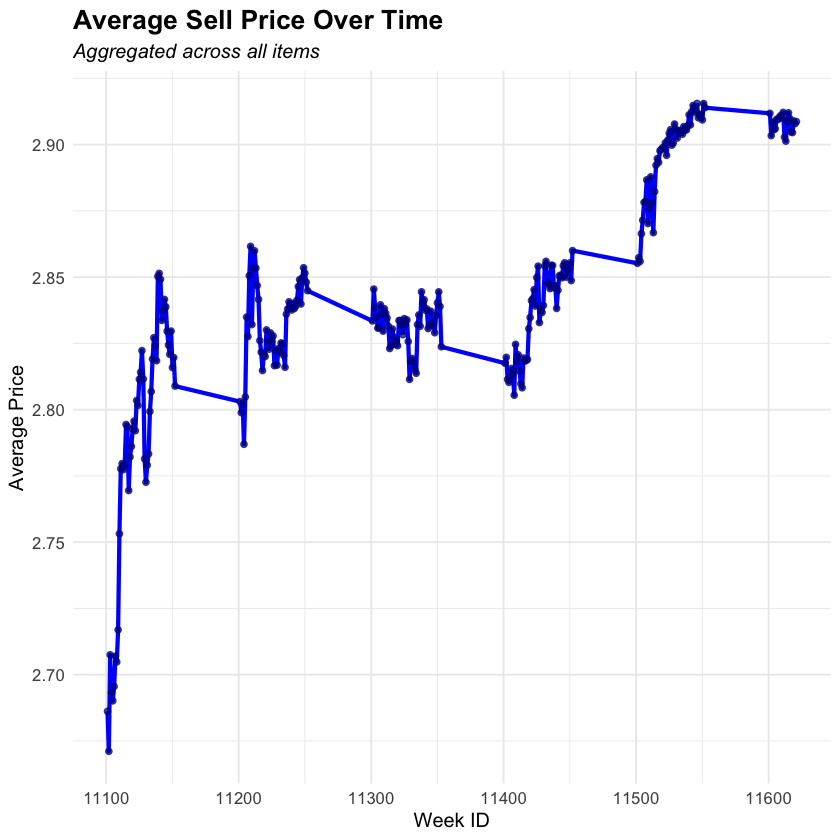

In [16]:
library(ggplot2)
library(dplyr)

# numerical
sell_prices <- sell_prices %>%
  mutate(week_id = as.numeric(wm_yr_wk))

# average price
overall_price_trend <- sell_prices %>%
  group_by(week_id) %>%
  summarize(avg_price = mean(sell_price, na.rm = TRUE), .groups = "drop")

# line diagram
ggplot(overall_price_trend, aes(x = week_id, y = avg_price)) +
  geom_line(color = "blue", size = 1.2) +
  geom_point(size = 1.5, color = "darkblue", alpha = 0.7) +
  labs(
    title = "Average Sell Price Over Time",
    subtitle = "Aggregated across all items",
    x = "Week ID",
    y = "Average Price"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  )


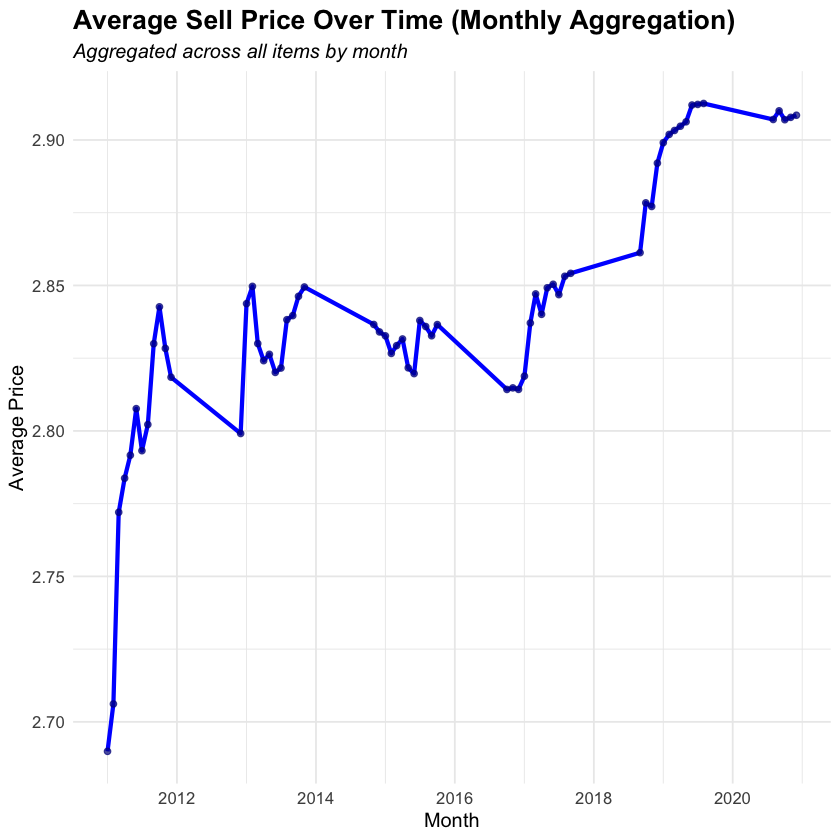

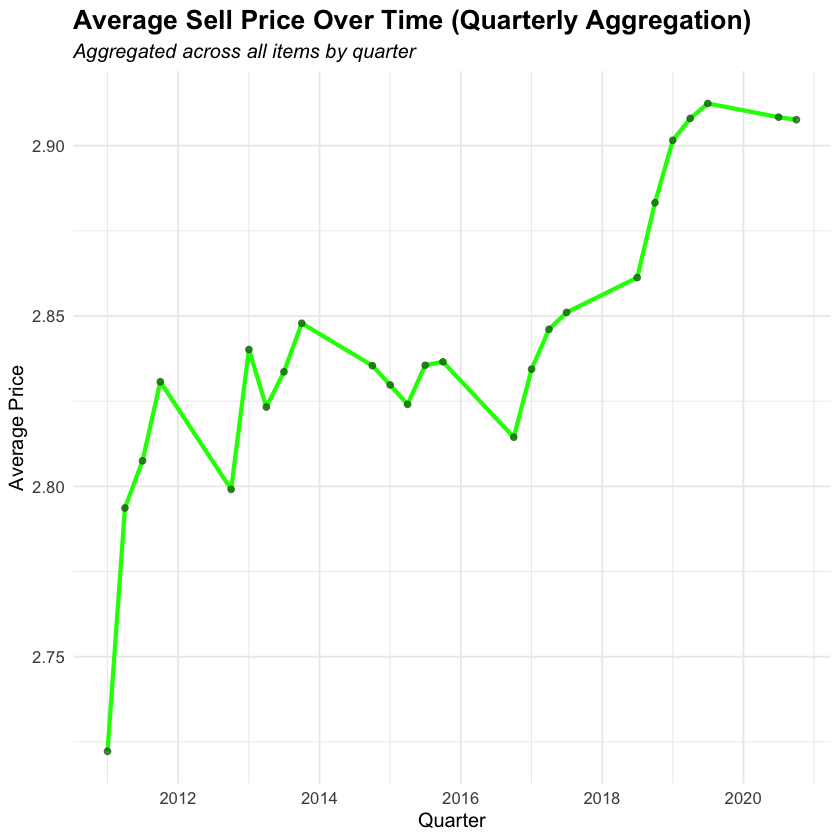

In [17]:
library(ggplot2)
library(dplyr)
library(lubridate)  # Időkezeléshez szükséges

# date
sell_prices <- sell_prices %>%
  mutate(date = ymd("2011-01-01") + weeks(wm_yr_wk - min(wm_yr_wk)))  # Heti azonosító átalakítása dátummá

# agregate month
monthly_price_trend <- sell_prices %>%
  mutate(month = floor_date(date, "month")) %>%  # Hónap szerint csoportosítás
  group_by(month) %>%
  summarize(avg_price = mean(sell_price, na.rm = TRUE), .groups = "drop")

# aggregate
quarterly_price_trend <- sell_prices %>%
  mutate(quarter = floor_date(date, "quarter")) %>%  # Negyedév szerint csoportosítás
  group_by(quarter) %>%
  summarize(avg_price = mean(sell_price, na.rm = TRUE), .groups = "drop")

# 
ggplot(monthly_price_trend, aes(x = month, y = avg_price)) +
  geom_line(color = "blue", size = 1.2) +
  geom_point(size = 1.5, color = "darkblue", alpha = 0.7) +
  labs(
    title = "Average Sell Price Over Time (Monthly Aggregation)",
    subtitle = "Aggregated across all items by month",
    x = "Month",
    y = "Average Price"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  )

# quartely data
ggplot(quarterly_price_trend, aes(x = quarter, y = avg_price)) +
  geom_line(color = "green", size = 1.2) +
  geom_point(size = 1.5, color = "darkgreen", alpha = 0.7) +
  labs(
    title = "Average Sell Price Over Time (Quarterly Aggregation)",
    subtitle = "Aggregated across all items by quarter",
    x = "Quarter",
    y = "Average Price"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  )


In [18]:
head(sales_train)

id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,⋯,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,⋯,0,0,0,0,2,0,0,5,2,0
FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,1,1,0,0,1,0,0,1,0,0
FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,2,0,0,0,0,0,0,0
FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,⋯,0,4,2,1,1,0,1,0,4,0
FOODS_3_006_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,2,1,0,0,1,1,1,0


In [19]:
head(sales_test )

id,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,⋯,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
FOODS_3_001_TX_3_validation,1,0,0,1,0,1,0,0,0,⋯,1,0,0,0,0,0,0,0,1,0
FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,2,0,0,2,1,0,3,1,1,1
FOODS_3_003_TX_3_validation,0,0,1,0,0,0,0,0,1,⋯,2,0,2,1,0,2,0,0,2,1
FOODS_3_004_TX_3_validation,0,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,0,0,0,1,0
FOODS_3_005_TX_3_validation,1,1,2,0,2,0,2,1,4,⋯,1,0,1,1,1,2,4,2,1,3
FOODS_3_006_TX_3_validation,0,1,1,0,1,1,3,1,0,⋯,0,6,0,1,0,0,1,2,1,1


In [20]:
head(sample_submission)

id,F1,F2,F3,F4,F5,F6,F7,F8,F9,⋯,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
FOODS_3_001_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FOODS_3_005_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FOODS_3_006_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
head(sales_test_evaluation)

id,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,⋯,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
FOODS_3_001_TX_3_validation,0,0,0,0,0,1,2,0,2,⋯,0,0,1,0,0,0,0,0,0,0
FOODS_3_002_TX_3_validation,5,0,2,2,2,0,1,0,1,⋯,6,2,3,4,4,6,6,0,0,0
FOODS_3_003_TX_3_validation,2,2,0,0,2,0,1,0,0,⋯,0,2,0,1,0,0,0,1,0,0
FOODS_3_004_TX_3_validation,0,1,0,0,0,0,0,1,0,⋯,0,0,1,0,1,3,0,0,0,0
FOODS_3_005_TX_3_validation,3,3,2,0,0,2,2,3,0,⋯,0,2,0,1,2,5,0,1,3,1
FOODS_3_006_TX_3_validation,0,0,0,1,2,0,0,1,1,⋯,1,2,0,0,0,0,0,0,0,0


`geom_smooth()` using formula = 'y ~ x'


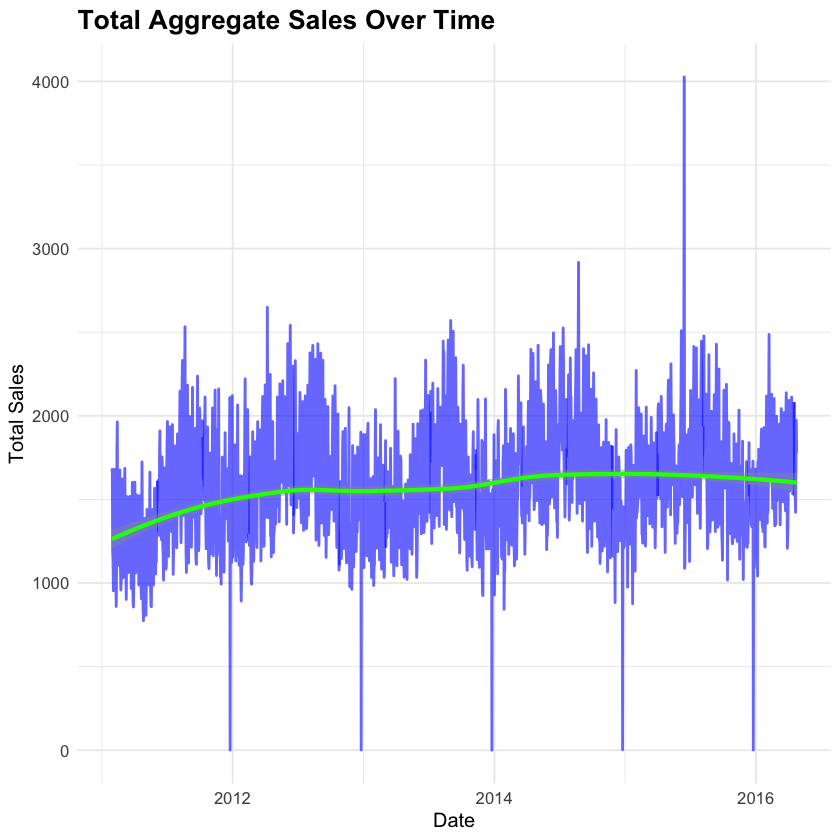

In [22]:
library(ggplot2)
library(dplyr)

#agreagate sales 
sales_aggregated <- sales_train %>%
  pivot_longer(cols = starts_with("d_"), names_to = "day", values_to = "sales") %>%
  mutate(day = as.numeric(sub("d_", "", day))) %>%
  group_by(day) %>%
  summarize(total_sales = sum(sales, na.rm = TRUE), .groups = "drop")

#days to date
start_date <- as.Date("2011-01-29")  # Az első nap dátuma
sales_aggregated <- sales_aggregated %>%
  mutate(date = start_date + day - 1)

ggplot(sales_aggregated, aes(x = date, y = total_sales)) +
  geom_line(color = "blue", alpha = 0.6, size = 0.8) +  # Az összesített eladások vonala
  geom_smooth(method = "loess", color = "green", size = 1.2) +  # Trendet kiemelő simított vonal
  labs(
    title = "Total Aggregate Sales Over Time",
    x = "Date",
    y = "Total Sales"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  )


Sales show a general upward trend, with a noticeable acceleration in growth during the most recent period (2015–2016). There is clear evidence of yearly seasonality, coupled with a pronounced weekly pattern. A sharp dip in sales is observed during Christmas, which aligns with the day of the year when stores are typically closed. Additionally, smaller dips in sales can be seen during specific holidays or events, likely reflecting reduced store operations or changes in consumer behavior.